In [15]:
# Import Dependencies
import pandas as pd
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [16]:
# Create reference to CSV file
csv_path = Path("Resources/pd_collisions_details_datasd.csv")
csv_path2 = Path("Resources/traffic_counts_datasd.csv")

df = pd.read_csv(csv_path, low_memory=False)
df_traffic = pd.read_csv(csv_path2, low_memory=False)

df_traffic.head(1)
# df.head(1)

,id,street_name,limits,northbound_count,southbound_count,eastbound_count,westbound_count,total_count,file_no,date_count
0,01AV018207,01 AV,A ST - ASH ST,18010,NaN,NaN,NaN,18010,0182-07,2007-03-13 00:00:00


In [17]:
df_traffic['date_count'] = pd.to_datetime(df_traffic['date_count'], format='%Y-%m-%d %H:%M:%S')
df_traffic.dtypes

id                          object
street_name                 object
limits                      object
northbound_count            object
southbound_count           float64
eastbound_count            float64
westbound_count            float64
total_count                  int64
file_no                     object
date_count          datetime64[ns]
dtype: object

In [18]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')
df.dtypes

report_id                            object
date_time                    datetime64[ns]
person_role                          object
person_injury_lvl                    object
person_veh_type                      object
veh_type                             object
veh_make                             object
veh_model                            object
police_beat                         float64
address_no_primary                  float64
address_pd_primary                   object
address_road_primary                 object
address_sfx_primary                  object
address_pd_intersecting              object
address_name_intersecting            object
address_sfx_intersecting             object
violation_section                    object
violation_type                       object
charge_desc                          object
injured                             float64
killed                              float64
hit_run_lvl                          object
dtype: object

In [19]:
#rename date column in traffic df and collisions df
df_traffic.rename(columns={'date_count': 'date'}, inplace=True)

df.rename(columns={'date_time': 'date'}, inplace=True)

C:\Users\aliac\AppData\Local\Temp\ipykernel_11592\2541701883.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_df['Year'] = injury_df['date'].dt.year


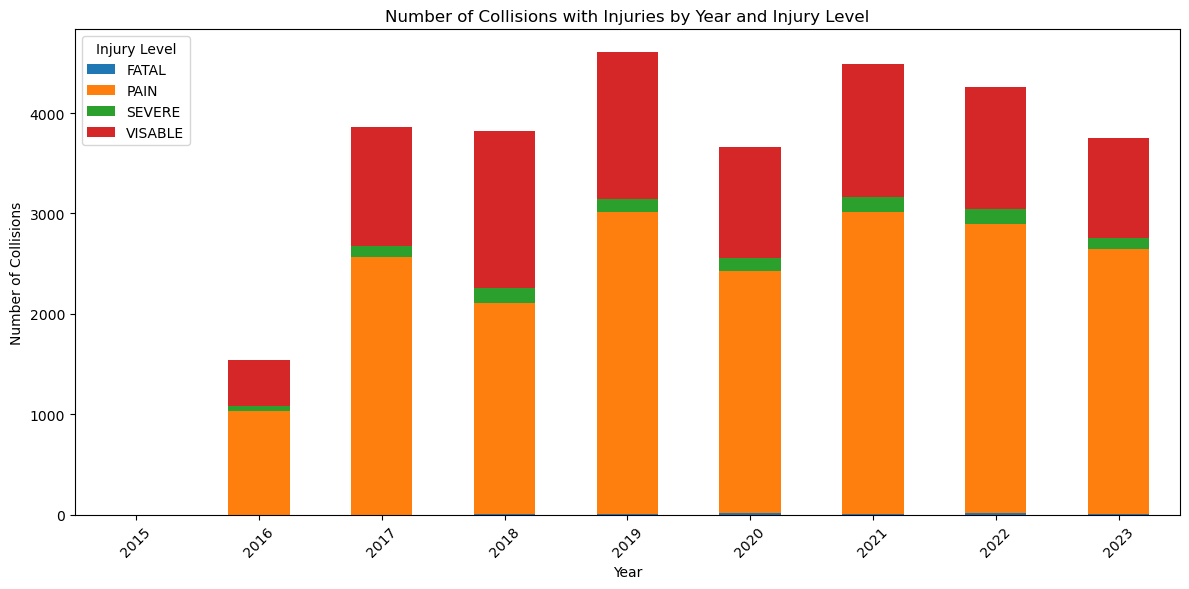

In [20]:
# Filter rows with injuries
injury_df = df[df['injured'] > 0]

# Extract year from the 'Date' column
injury_df['Year'] = injury_df['date'].dt.year

# Group by year and injury level
grouped_data = injury_df.groupby(['Year', 'person_injury_lvl']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax)
plt.title('Number of Collisions with Injuries by Year and Injury Level')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.legend(title='Injury Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# df['charge_desc'].unique()


In [22]:
df['charge_desc'].value_counts()


charge_desc
MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHICLE CODE             17982
TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I)                        16355
TURNING MOVEMENTS AND REQUIRED SIGNALS                             11582
UNSAFE SPEED (BASIC SPEED LAW) (I)                                 10836
VIOLATION OF BASIC SPEED LAW, SPEED UNSAFE FOR CONDITIONS           5809
                                                                   ...  
PEDESTRIAN ON FREEWAY                                                  1
BICYCLIST MUST OBEY RULES OF THE ROAD (I)                              1
CARRYING WHITE CANE BY OTHER THAN BLIND PERSON                         1
LEAVE MOTORIZED SCOOTER ON SIDEWALK BLOCKING PEDESTRIAN TRAFFIC        1
VEH EXCEED FRAME HEIGHTS (M)                                           1
Name: count, Length: 435, dtype: int64

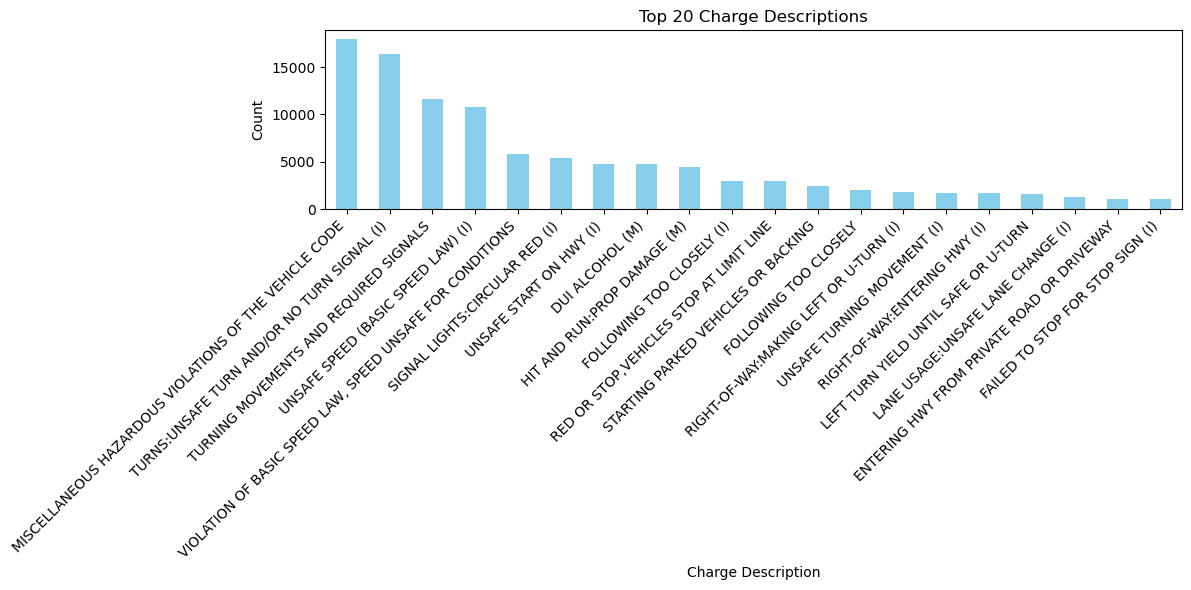

In [23]:
charge_desc_counts = df['charge_desc'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
charge_desc_counts[:20].plot(kind='bar', color='skyblue')
plt.title('Top 20 Charge Descriptions')
plt.xlabel('Charge Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [24]:
# Select the columns
new_df = df[['date', 'charge_desc', 'injured', 'killed', 'person_injury_lvl']].copy()

# Keep only rows with injuries
new_df = new_df[new_df['injured'] > 0]

# Reset the index if needed
new_df.reset_index(drop=True, inplace=True)

# Display the new DataFrame
print(new_df.head())


                 date                                        charge_desc  \
0 2015-03-24 03:05:00             TURNING MOVEMENTS AND REQUIRED SIGNALS   
1 2015-03-27 23:56:00             TURNING MOVEMENTS AND REQUIRED SIGNALS   
2 2015-08-22 13:45:00  MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...   
3 2015-12-01 17:45:00                     PEDESTRIANS OUTSIDE CROSSWALKS   
4 2016-01-04 10:12:00         ENTERING HWY FROM PRIVATE ROAD OR DRIVEWAY   

   injured  killed person_injury_lvl  
0      2.0     0.0           VISABLE  
1      1.0     0.0              PAIN  
2      1.0     0.0               NaN  
3      1.0     0.0               NaN  
4      2.0     0.0               NaN  


In [25]:
print(df_traffic.columns)


Index(['id', 'street_name', 'limits', 'northbound_count', 'southbound_count',
       'eastbound_count', 'westbound_count', 'total_count', 'file_no', 'date'],
      dtype='object')


In [26]:
#Remove data for dates before 2016
new_df['date'] = pd.to_datetime(new_df['date'])
df_traffic['date'] = pd.to_datetime(df_traffic['date'])

# Filter the DataFrame to keep only rows where the 'date' is later than 2016-01-01
new_df = new_df[new_df['date'] > '2016-01-01']
df_traffic = df_traffic[df_traffic['date'] > '2016-01-01']


In [29]:
# Sort the DataFrame by the 'date' column
df_traffic = df_traffic.sort_values(by='date')


In [30]:
#Create a new final DataFrame
traffic_tot = df_traffic[['total_count', 'date']].copy()

# Display the result DataFrame
print(traffic_tot.head())

      total_count       date
7181         2599 2016-01-05
5691         2270 2016-01-05
8138         3610 2016-01-05
271          6489 2016-01-05
2089          632 2016-01-07


In [31]:
new_df.to_csv('D:\DATA_PROJECTS\SD_CAR_CRASH\sd_crashes\pd_collision_df.csv')
traffic_tot.to_csv('D:\DATA_PROJECTS\SD_CAR_CRASH\sd_crashes\street_traffic_totals.csv')